## 빅데이터 활용 AI 설계
# VGG-16 모델 적용 : Cifar-10 학습

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.applications import VGG16

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

In [ ]:
'''
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

image = load_img('bob_dylan.jpg')
bob = img_to_array(image)

input_image = np.expand_dims(bob, axis=0)
input_image = preprocess_input(input_image)

conv_result = vgg16.predict(input_image)
conv_result.shape
'''

In [11]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train/255.
X_test = X_test/255.

y_train = to_categorical(y_train)
y_test = to_categorical(y_test, 10)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [54]:
conv_images = vgg16.predict(X_train).reshape(50000,-1)

In [55]:
conv_images.shape

(50000, 512)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [56]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(512,)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['acc'])

In [59]:
model.fit(conv_images, y_train, batch_size=128, epochs=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 15s 364us/step - loss: 1.9584 - acc: 0.2989 - val_loss: 1.6234 - val_acc: 0.4700
Epoch 2/100
40000/40000 [==============================] - 13s 328us/step - loss: 1.6115 - acc: 0.4398 - val_loss: 1.4761 - val_acc: 0.4984
Epoch 3/100
40000/40000 [==============================] - 13s 329us/step - loss: 1.5031 - acc: 0.4793 - val_loss: 1.4071 - val_acc: 0.5173
Epoch 4/100
40000/40000 [==============================] - 13s 331us/step - loss: 1.4338 - acc: 0.5027 - val_loss: 1.3583 - val_acc: 0.5319
Epoch 5/100
40000/40000 [==============================] - 14s 340us/step - loss: 1.3918 - acc: 0.5174 - val_loss: 1.3274 - val_acc: 0.5442
Epoch 6/100
40000/40000 [==============================] - 13s 334us/step - loss: 1.3604 - acc: 0.5288 - val_loss: 1.3019 - val_acc: 0.5512
Epoch 7/100
40000/40000 [==============================] - 13s 332us/step - loss: 1.3314 - acc: 0.5382 - val_l

40000/40000 [==============================] - 15s 384us/step - loss: 1.0004 - acc: 0.6572 - val_loss: 1.1005 - val_acc: 0.6196
Epoch 59/100
40000/40000 [==============================] - 15s 384us/step - loss: 0.9995 - acc: 0.6533 - val_loss: 1.0994 - val_acc: 0.6225
Epoch 60/100
40000/40000 [==============================] - 14s 343us/step - loss: 0.9959 - acc: 0.6563 - val_loss: 1.0981 - val_acc: 0.6247
Epoch 61/100
40000/40000 [==============================] - 14s 343us/step - loss: 0.9945 - acc: 0.6563 - val_loss: 1.0988 - val_acc: 0.6231
Epoch 62/100
40000/40000 [==============================] - 14s 350us/step - loss: 0.9903 - acc: 0.6596 - val_loss: 1.0962 - val_acc: 0.6237
Epoch 63/100
40000/40000 [==============================] - 14s 355us/step - loss: 0.9928 - acc: 0.6587 - val_loss: 1.0960 - val_acc: 0.6233
Epoch 64/100
40000/40000 [==============================] - 14s 351us/step - loss: 0.9851 - acc: 0.6621 - val_loss: 1.0959 - val_acc: 0.6231
Epoch 65/100
40000/40000 [

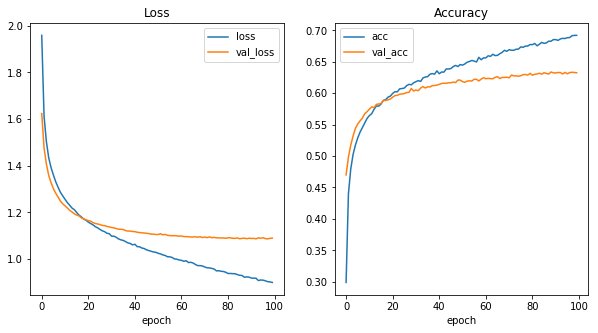

In [60]:
h = model.history.history
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])